In [1]:
from sea_breeze import load_model_data
from climtas.nci import GadiClient
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from sea_breeze.sea_breeze_funcs import kinematic_frontogenesis
import xarray as xr
import metpy.units as units

In [2]:
GadiClient()

2025-01-24 10:49:42,809 - distributed.preloading - INFO - Creating preload: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py
2025-01-24 10:49:42,813 - distributed.utils - INFO - Reload module schedplugin from .py file
2025-01-24 10:49:42,817 - distributed.preloading - INFO - Import preload module: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37661 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /node/gadi-cpu-bdw-0008.gadi.nci.org.au/20681/proxy/37661/status,
Dashboard: /node/gadi-cpu-bdw-0008.gadi.nci.org.au/20681/proxy/37661/status,Workers: 7
Total threads: 7,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40355,Workers: 7
Dashboard: /node/gadi-cpu-bdw-0008.gadi.nci.org.au/20681/proxy/37661/status,Total threads: 7
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:37851,Total threads: 1
Dashboard: /node/gadi-cpu-bdw-0008.gadi.nci.org.au/20681/proxy/46755/status,Memory: 4.57 GiB
Nanny: tcp://127.0.0.1:32845,


2025-01-24 11:34:07,462 - distributed.scheduler - WARNING - Detected different `run_spec` for key 'original-open_dataset-ua100m-2946f20f68a30b50fdc1f5e7f37510e8' between two consecutive calls to `update_graph`. This can cause failures and deadlocks down the line. Please ensure unique key names. If you are using a standard dask collections, consider releasing all the data before resubmitting another computation. More details and help can be found at https://github.com/dask/dask/issues/9888. 
Debugging information
---------------------
old task state: released
old run_spec: (<function execute_task at 0x150ce48f2320>, (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=_ElementwiseFunctionArray(_ElementwiseFunctionArray(LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x150c4dae7200>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))), func=functools.partial(<function _apply_ma

In [136]:
lon_slice = slice(140,157)
lat_slice = slice(-40,-27)    
# lon_slice = slice(108,159)
# lat_slice = slice(-45.7,-6.831799)    
#t1 = "2024-05-19 00:00"
#t2 = "2024-05-28 00:00"
t1 = "2024-05-01 00:00"
t2 = "2024-05-31 23:00"

In [137]:
ua100m = xr.open_dataset(
    "/g/data/ob53/BARRA2/output/reanalysis/AUST-04/BOM/ERA5/historical/hres/BARRA-C2/v1/1hr/ua100m/latest/ua100m_AUST-04_ERA5_historical_hres_BOM_BARRA-C2_v1_1hr_202405-202405.nc",
    chunks={}).sel(time=slice(t1,t2),lat=lat_slice,lon=lon_slice).ua100m
va100m = xr.open_dataset(
    "/g/data/ob53/BARRA2/output/reanalysis/AUST-04/BOM/ERA5/historical/hres/BARRA-C2/v1/1hr/va100m/latest/va100m_AUST-04_ERA5_historical_hres_BOM_BARRA-C2_v1_1hr_202405-202405.nc",
    chunks={}).sel(time=slice(t1,t2),lat=lat_slice,lon=lon_slice).va100m
ws = np.sqrt(ua100m**2 + va100m**2)
wpd = xr.where((ws>=3) & (ws<25), 0.5 * 1.22 * ws**3, 0)

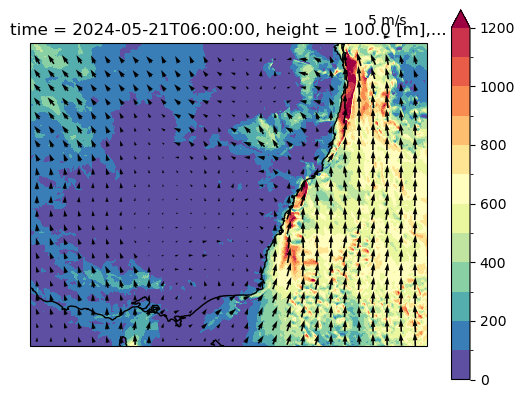

In [128]:
time="2024-05-21 06:00"

temp = xr.Dataset({"u":ua100m.sel(time=time), "v":va100m.sel(time=time)})

ax=plt.axes(projection=ccrs.PlateCarree())
wpd.sel(time=time).plot(
    cmap="Spectral_r",
    levels=13,
    extend="max"
    ,add_colorbar=True,
    vmin=0,
    vmax=1200)

q = temp.coarsen({"lat":15,"lon":15},boundary="trim").mean().plot.quiver(ax=ax,x="lon",y="lat",u="u",v="v",width=0.004,scale=300,color="k",add_guide=False)
qk = plt.quiverkey(q,0.9,1.02,5,"5 m/s",coordinates="axes")

ax.coastlines()

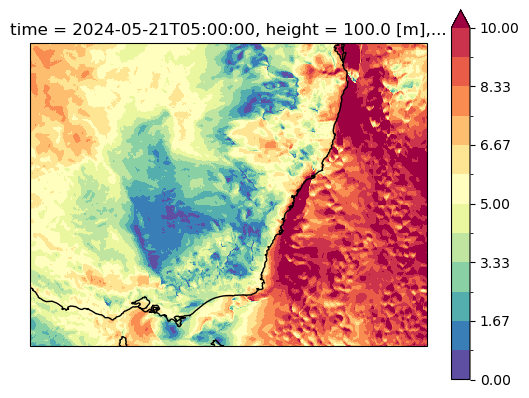

In [129]:
ax=plt.axes(projection=ccrs.PlateCarree())
ws.sel(time="2024-05-21 05:00").plot(
    cmap="Spectral_r",
    levels=13,
    extend="max"
    ,add_colorbar=True,
    vmin=0,
    vmax=10)
ax.coastlines()

In [138]:
avg_u6 = ua100m.groupby(wpd.time.dt.hour).mean().sel(hour=6).persist()
avg_v6 = va100m.groupby(wpd.time.dt.hour).mean().sel(hour=6).persist()
avg_u18 = ua100m.groupby(wpd.time.dt.hour).mean().sel(hour=18).persist()
avg_v18 = va100m.groupby(wpd.time.dt.hour).mean().sel(hour=18).persist()

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:find_group_cohorts: cohorts is preferred, chunking is perfect.
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=cohorts
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:find_group_cohorts: cohorts is preferred, chunking is perfect.
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=cohorts
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, re

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:find_group_cohorts: bitmask sparsity=0.4758771929824561, merge=False, choosing 'map-reduce'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=map-reduce
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is True
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:find_group_cohorts: bitmask sparsity=0.4758771929824561, merge=False, choosing 'map-reduce'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=map-reduce
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is True


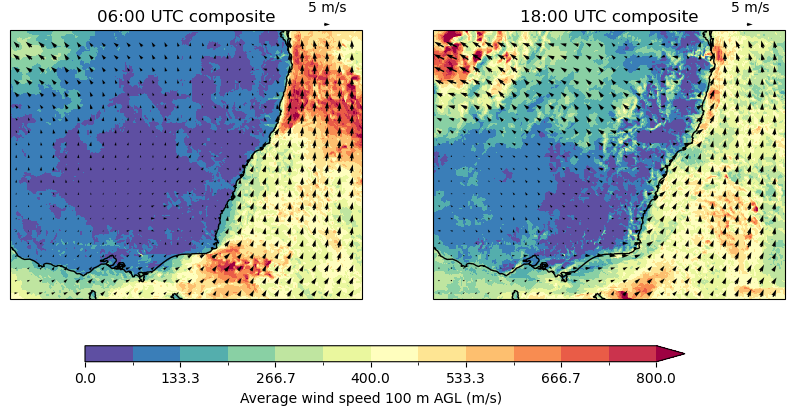

In [135]:
temp6 = xr.Dataset({"u":avg_u6, "v":avg_v6})
temp18 = xr.Dataset({"u":avg_u18, "v":avg_v18})

plt.figure(figsize=[10,4])
ax=plt.subplot(1,2,1,projection=ccrs.PlateCarree())

c=wpd.groupby(wpd.time.dt.hour).mean().sel(hour=6).plot(
    cmap="Spectral_r",
    levels=13,
    extend="max"
    ,add_colorbar=False,
    vmin=0,
    vmax=800)
q = temp6.coarsen({"lat":15,"lon":15},boundary="trim").mean().plot.quiver(ax=ax,x="lon",y="lat",u="u",v="v",width=0.004,scale=300,color="k",add_guide=False)
qk = plt.quiverkey(q,0.9,1.02,5,"5 m/s",coordinates="axes")
ax.coastlines()
ax.set_title("06:00 UTC composite")

ax=plt.subplot(1,2,2,projection=ccrs.PlateCarree())
c=wpd.groupby(wpd.time.dt.hour).mean().sel(hour=18).plot(
    cmap="Spectral_r",
    levels=13,
    extend="max"
    ,add_colorbar=False,
    vmin=0,
    vmax=800)
q = temp18.coarsen({"lat":15,"lon":15},boundary="trim").mean().plot.quiver(ax=ax,x="lon",y="lat",u="u",v="v",width=0.004,scale=300,color="k",add_guide=False)
qk = plt.quiverkey(q,0.9,1.02,5,"5 m/s",coordinates="axes")
ax.coastlines()
ax.set_title("18:00 UTC composite")

cax = plt.axes([0.2,0.002,0.6,0.04])
cb=plt.colorbar(c,cax=cax,orientation="horizontal")
cb.set_label("Average wind speed 100 m AGL (m/s)")

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:find_group_cohorts: cohorts is preferred, chunking is perfect.
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=cohorts
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:find_group_cohorts: cohorts is preferred, chunking is perfect.
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=cohorts
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False


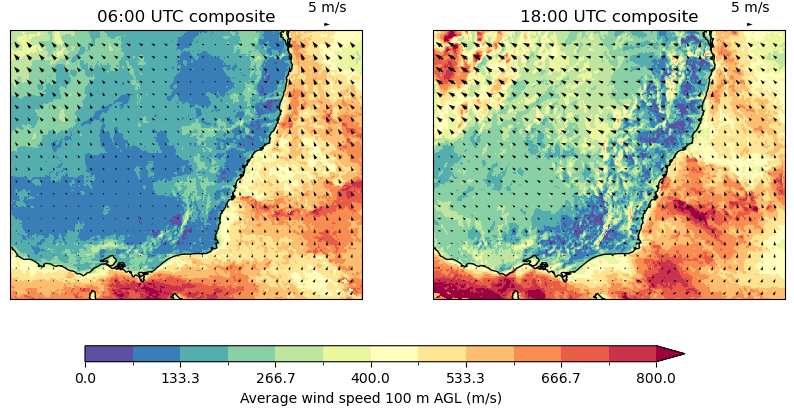

In [139]:
temp6 = xr.Dataset({"u":avg_u6, "v":avg_v6})
temp18 = xr.Dataset({"u":avg_u18, "v":avg_v18})

plt.figure(figsize=[10,4])
ax=plt.subplot(1,2,1,projection=ccrs.PlateCarree())

c=wpd.groupby(wpd.time.dt.hour).mean().sel(hour=6).plot(
    cmap="Spectral_r",
    levels=13,
    extend="max"
    ,add_colorbar=False,
    vmin=0,
    vmax=800)
q = temp6.coarsen({"lat":15,"lon":15},boundary="trim").mean().plot.quiver(ax=ax,x="lon",y="lat",u="u",v="v",width=0.004,scale=300,color="k",add_guide=False)
qk = plt.quiverkey(q,0.9,1.02,5,"5 m/s",coordinates="axes")
ax.coastlines()
ax.set_title("06:00 UTC composite")

ax=plt.subplot(1,2,2,projection=ccrs.PlateCarree())
c=wpd.groupby(wpd.time.dt.hour).mean().sel(hour=18).plot(
    cmap="Spectral_r",
    levels=13,
    extend="max"
    ,add_colorbar=False,
    vmin=0,
    vmax=800)
q = temp18.coarsen({"lat":15,"lon":15},boundary="trim").mean().plot.quiver(ax=ax,x="lon",y="lat",u="u",v="v",width=0.004,scale=300,color="k",add_guide=False)
qk = plt.quiverkey(q,0.9,1.02,5,"5 m/s",coordinates="axes")
ax.coastlines()
ax.set_title("18:00 UTC composite")

cax = plt.axes([0.2,0.002,0.6,0.04])
cb=plt.colorbar(c,cax=cax,orientation="horizontal")
cb.set_label("Average wind speed 100 m AGL (m/s)")

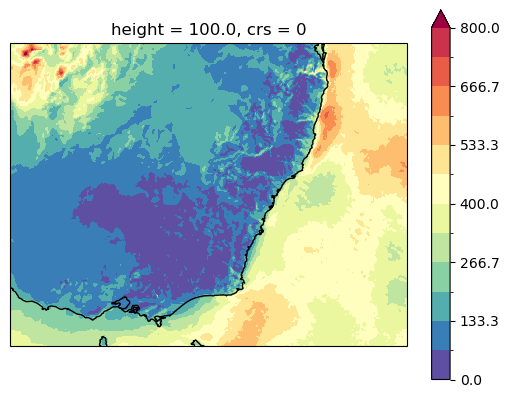

In [121]:
ax=plt.axes(projection=ccrs.PlateCarree())
wpd.mean("time").plot(
    cmap="Spectral_r",
    levels=13,
    extend="max"
    ,add_colorbar=True,
    vmin=0,
    vmax=800)
ax.coastlines()

In [104]:
ts = xr.open_dataset(
    "/g/data/ob53/BARRA2/output/reanalysis/AUST-04/BOM/ERA5/historical/hres/BARRA-C2/v1/1hr/ts/latest/ts_AUST-04_ERA5_historical_hres_BOM_BARRA-C2_v1_1hr_202405-202405.nc",
    chunks={}).sel(time=slice(t1,t2),lat=lat_slice,lon=lon_slice).ts

In [109]:
_,lsm = load_model_data.load_barra_static(
    "AUST-04",
    lon_slice,
    lat_slice)

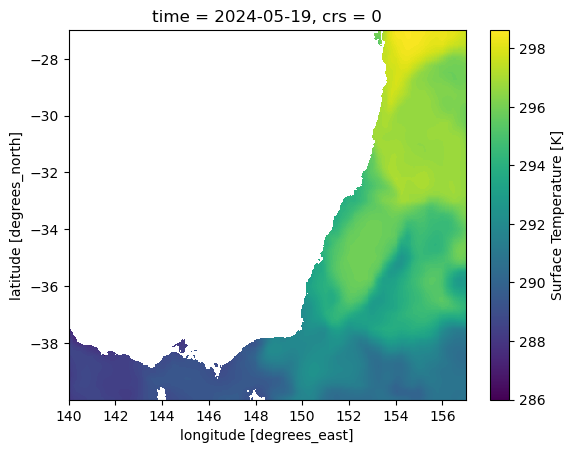

In [119]:
xr.plot.pcolormesh(ts.isel(time=0).where(lsm==0,np.nan))